
#### MBD 2022-2023
# Fundamentals of NLP Group Project

# Advanced Sentimental Analysis

**Import Libraries**

**Please install the following library if these are not installed in your environment**

# Libraries

In [78]:
!pip install spacytextblob
!pip install transformers
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 34.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [82]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
#importing libraries

#preprocessing data
import pandas as pd
import numpy as np
import datetime as dt
import math 
import string
from pandas import DataFrame
from numpy import array
from matplotlib import pyplot
from collections import Counter

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as snsb

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Nautural Language processing libraries
import re
import spacy 
from spacytextblob.spacytextblob import SpacyTextBlob
from wordcloud import *
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import gensim

#sentiment analsyis libraries 
#RoBERTa model from HuggingFace
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats.stats import pearsonr
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import *
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer


import sys

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_colwidth = None


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


TypeError: ignored

# 1. Data Exploration

### 1. Import and clean Data

In [11]:
# Reading in data
data = pd.read_table('/content/drive/MyDrive/NLP Group Project/drugsComTrain_raw.tsv', delimiter='\t', encoding='utf-8') 

In [12]:
# Inspecting data dataframe
data.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [14]:
# Check shape
data.shape

(161297, 7)

In [15]:
# Check columns
data.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [16]:
# Renaming column names to avoid ambiguity
data = data.rename(columns={'Unnamed: 0': 'ID', 'review': 'patientreview', 'date': 'reviewdate', 'usefulCount': 'Useful'})

In [17]:
# Changing 'reviewdate' column's data type from 'Object' to 'datetime' 
data['reviewdate'] = pd.to_datetime(data['reviewdate'])

In [18]:
# Check number of missing values
data.isna().sum()

ID                 0
drugName           0
condition        899
patientreview      0
rating             0
reviewdate         0
Useful             0
dtype: int64

We can see that there are 483 null values in the 'condition' column of the data. These are very few compared to the size of the data. Therefore, we will drop these null values.

In [19]:
data = data.dropna()

In [20]:
#There are a few rows where the rating and condition are intermixed. dropping such rows
condition_errorTR = data[data['condition'].str.contains('users found this')]
data = data.drop(condition_errorTR.index)

In [21]:
# Check the shape of data post dropping
data.shape

(159498, 7)

In [22]:
# Check unique values in data
data.condition.nunique()

811

In [23]:
# Check drugName in data
data.drugName.nunique()

3412

In [24]:
# Check for duplicated values in data
data.duplicated().sum()

0

### 2. Subset Data

In [25]:
# Function to create a subset
def create_subset(data, subset_size=10):
    # Group the DataFrame by condition and get the number of unique drugNames for each group
    condition_drug_counts = data.groupby('condition')['drugName'].nunique()

    # Create a boolean mask that selects the rows where the number of unique drugNames is less than 3
    eliminated_conditions = condition_drug_counts[condition_drug_counts < 3].index
    mask = data['condition'].isin(eliminated_conditions)

    # Use the boolean mask to filter out the rows from the original DataFrame
    data = data[~mask]

    # Group the DataFrame by condition
    grouped_data = data.groupby('condition', group_keys=False)

    # For each group, sample up to subset_size samples and combine them into a new DataFrame
    subset = grouped_data.apply(lambda x: x.sample(n=min(len(x), subset_size)))

    # Reset the index of the subset DataFrame
    subset = subset.reset_index(drop=True)

    # Print the shape of the subset DataFrame
    print('Shape of the subset: ', subset.shape)

    return subset

In [26]:
# Applying Function
data_sub = create_subset(data)

Shape of the subset:  (4514, 7)


In [27]:
# Check unique values in data_sub
data_sub.condition.nunique()

500

In [28]:
# Check drugName in data_sub
data_sub.drugName.nunique()

1450

In [29]:
# Check for duplicated values in data_sub
data_sub.duplicated().sum()

0

### 3. Exploratory Data Analysis

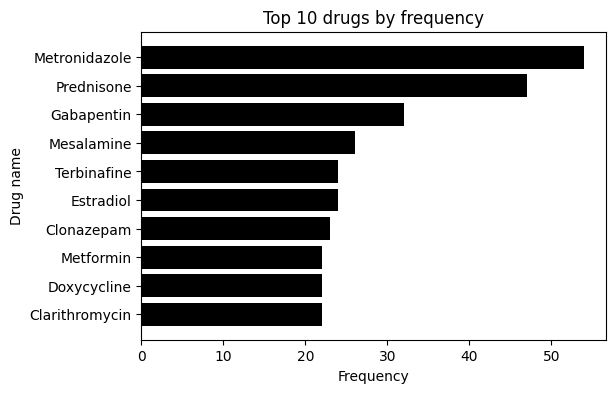

In [30]:
# Drugs frequency
drugs = data_sub['drugName'].value_counts().sort_values(ascending = False).head(10)

plt.figure(figsize=(6,4))
plt.barh(drugs.index, drugs.values, color='black')
plt.title('Top 10 drugs by frequency')
plt.xlabel("Frequency")
plt.ylabel("Drug name")
plt.gca().invert_yaxis()
plt.show()

In [31]:
#Average rating per drug
avg_rating = data_sub.groupby('drugName')['rating'].mean().reset_index()
avg_rating = avg_rating[avg_rating['drugName'].isin(drugs.index)].sort_values('rating', ascending=False).reset_index(drop=True)
avg_rating

drugName    rating
0       Metformin  8.500000
1      Clonazepam  8.478261
2      Prednisone  8.085106
3     Doxycycline  7.590909
4      Mesalamine  6.923077
5   Metronidazole  6.888889
6      Gabapentin  6.593750
7       Estradiol  6.500000
8     Terbinafine  6.416667
9  Clarithromycin  4.227273

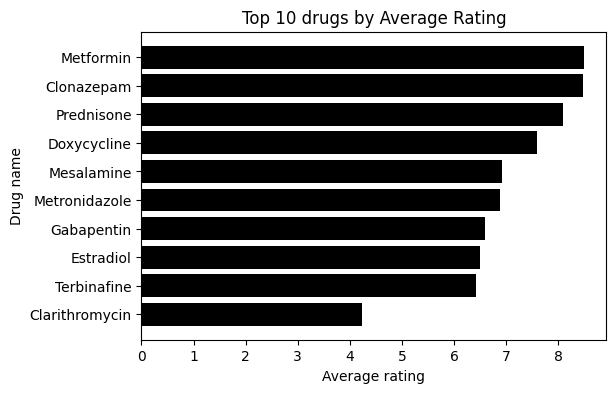

In [32]:
#Plot for average rating per drug
plt.figure(figsize=(6,4))
plt.barh(avg_rating['drugName'], avg_rating['rating'], color = 'black')
plt.title('Top 10 drugs by Average Rating')
plt.xlabel('Average rating')
plt.ylabel('Drug name')
plt.gca().invert_yaxis()
plt.show()

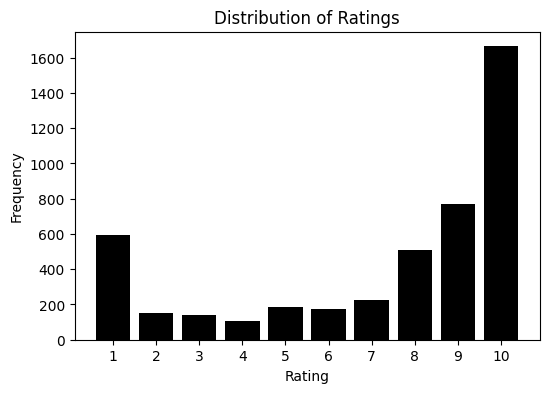

In [33]:
#Rating distribution
rating = data_sub['rating'].value_counts().sort_index().head(10)

plt.figure(figsize=(6,4))
plt.bar(rating.index, rating.values, color = 'black')
plt.title('Distribution of Ratings')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rating.index)
plt.show()

In [34]:
#Top 10 conditions
condition = effectiveness = data_sub.groupby('condition')['rating'].count()
condition = condition.sort_values(ascending = False).head(10)

In [35]:
#Average rating per condition (Effectiveness)
effectiveness = data_sub.groupby('condition')['rating'].mean().reset_index()
effectiveness = effectiveness[effectiveness['condition'].isin(condition.index)].sort_values('rating', ascending=False).reset_index(drop=True)
effectiveness

condition  rating
0                  Non-Small Cell Lung Cance     9.4
1               Obsessive Compulsive Disorde     8.5
2  Obstructive Sleep Apnea/Hypopnea Syndrome     8.5
3                                    Obesity     8.3
4                               Oophorectomy     7.6
5              New Daily Persistent Headache     7.2
6                          Not Listed / Othe     7.1
7                  Onychomycosis, Fingernail     7.0
8                                       ADHD     6.6
9                     Onychomycosis, Toenail     6.1

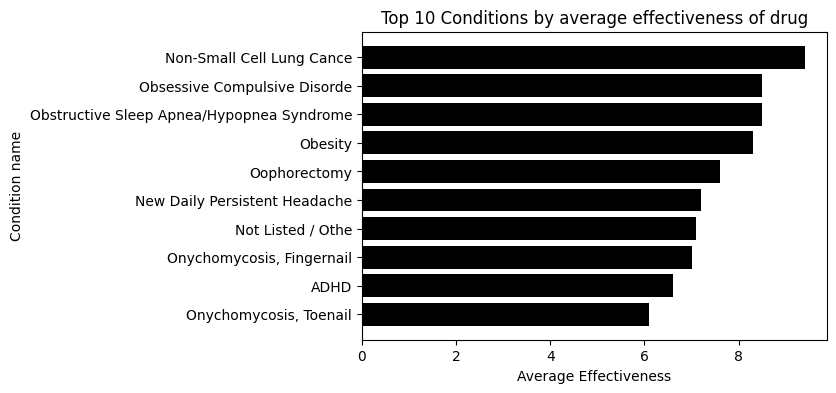

In [36]:
# Plot for Effectiveness of drug for condition
plt.figure(figsize=(6,4))
plt.barh(effectiveness['condition'], effectiveness['rating'], color = 'black')
plt.title('Top 10 Conditions by average effectiveness of drug')
plt.xlabel('Average Effectiveness')
plt.ylabel('Condition name')
plt.gca().invert_yaxis()
plt.show()

# Manual Sentiment based on Rating

In [37]:
# Assigning sentiment score based on the rating given by the customers assuming that higher rating would mean positive reviews
# 1 is positive, 0 is neutral, -1 is negative

# Training dataset
data_sub.loc[(data_sub['rating'] >= 7), 'Manual_Sentiment'] = 1
data_sub.loc[(data_sub['rating'] < 7), 'Manual_Sentiment'] = 0
data_sub.loc[(data_sub['rating'] < 4), 'Manual_Sentiment'] = -1

In [38]:
#Checking Manual Sentiment distribution in data_sub
data_sub['Manual_Sentiment'].value_counts()

 1.0    3164
-1.0     883
 0.0     467
Name: Manual_Sentiment, dtype: int64

In [39]:
data_sub.head(2)

ID         drugName condition  \
0  158516  Methylphenidate      ADHD   
1   37655          Vyvanse      ADHD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       patientreview  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                  "I would have to say wow! It helped me focus during school. I used to be an average student, now I have straight A&#039;s. and I don&#039;t have a problem getting anything done"   
1  "I started Vyvanse about 5 months ago.  My doctor first had me on Focalin which helped, but didn&#039;t seem to get me all the way there.  Since I have generalized anxiety disorder he started with Focalin.  He said Focalin was a gentler medication.  After about 2 weeks he started Vyvanse at 20mg. I really started to like the medication: more focus, motivation.  I have worked my way up to 50mg.  After a couple of weeks on each dose, the medication doesn&#039;t last the whole 12 hours.  I do really like the medication.  I just hope that I don&#039;t have to keep going up with the dosage."   

   rating reviewdate  Useful  Manual_Sentiment  
0     9.0 2015-02-03      40               1.0  
1     3.0 2009-06-24      18              -1.0

# Preprocess

In [40]:
#Load spacy
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Define function to clean text data, this fucntion removes HTML tags, special characters, and digits from the text data, converts it to lowercase, 
# and removes extra whitespaces.

def clean_text(text):
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    text = re.sub('[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub('\s+', ' ', text).strip()
    return text

#Preprocessing the text: filters out stopwords, punctuation, and whitespace, tokenizes and lemmatises
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [41]:
#Apply text cleaning to 'patientreview' column of train data
data_sub['review_cleaned'] = data_sub['patientreview'].apply(clean_text)

#Apply text cleaning to 'review_cleaned' column of train data
data_sub['review_cleaned'] = data_sub['review_cleaned'].apply(preprocess_text)

In [42]:
# Calculate number of charcters in each review in data_sub
data_sub['reviewchars'] = data_sub['patientreview'].apply(len)

# Calculate number of charcters in each clean review in data_sub
data_sub['reviewchars_clean'] = data_sub['review_cleaned'].apply(len)

In [43]:
# Calculate number of words in each review in data_sub
data_sub['reviewwords'] = data_sub['patientreview'].apply(lambda x:len(nltk.word_tokenize(x)))

# Calculate number of words in each clean review in data_sub
data_sub['reviewwords_clean'] = data_sub['review_cleaned'].apply(lambda x:len(nltk.word_tokenize(x)))

In [44]:
# Calculate number of sentences in each review in data_sub
data_sub['reviewsentence'] = data_sub['patientreview'].apply(lambda x:len(nltk.sent_tokenize(x)))

# Calculate number of sentences in each review in data_sub
data_sub['reviewsentence_clean'] = data_sub['review_cleaned'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [45]:
data_sub.head(2)

ID         drugName condition  \
0  158516  Methylphenidate      ADHD   
1   37655          Vyvanse      ADHD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       patientreview  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                  "I would have to say wow! It helped me focus during school. I used to be an average student, now I have straight A&#039;s. and I don&#039;t have a problem getting anything done"   
1  "I started Vyvanse about 5 months ago.  My doctor first had me on Focalin which helped, but didn&#039;t seem to get me all the way there.  Since I have generalized anxiety disorder he started with Focalin.  He said Focalin was a gentler medication.  After about 2 weeks he started Vyvanse at 20mg. I really started to like the medication: more focus, motivation.  I have worked my way up to 50mg.  After a couple of weeks on each dose, the medication doesn&#039;t last the whole 12 hours.  I do really like the medication.  I just hope that I don&#039;t have to keep going up with the dosage."   

   rating reviewdate  Useful  Manual_Sentiment  \
0     9.0 2015-02-03      40               1.0   
1     3.0 2009-06-24      18              -1.0   

                                                                                                                                                                                                                                                                  review_cleaned  \
0                                                                                                                                                                                                                 wow help focus school average student straight not problem get   
1  start vyvanse month ago doctor focalin help not way generalize anxiety disorder start focalin say focalin gentler medication week start vyvanse mg start like medication focus motivation work way mg couple week dose medication not hour like medication hope not go dosage   

   reviewchars  reviewchars_clean  reviewwords  reviewwords_clean  \
0          177                 62           48                 10   
1          593                269          137                 42   

   reviewsentence  reviewsentence_clean  
0               3                     1  
1              10                     1

# Visualisation

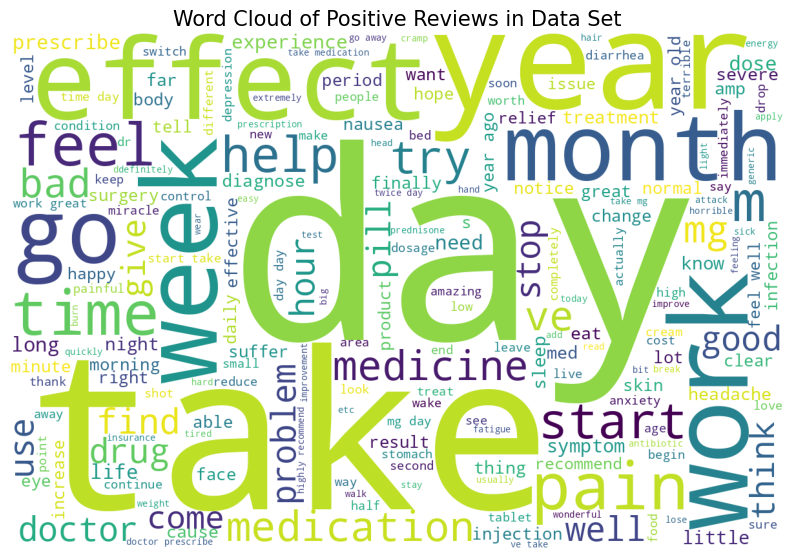

In [46]:
#Wordcloud for the manual postive sentiments
positive = " ".join([text for text in data_sub['review_cleaned'][data_sub['Manual_Sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 800).generate(positive)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud of Positive Reviews in Data Set', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

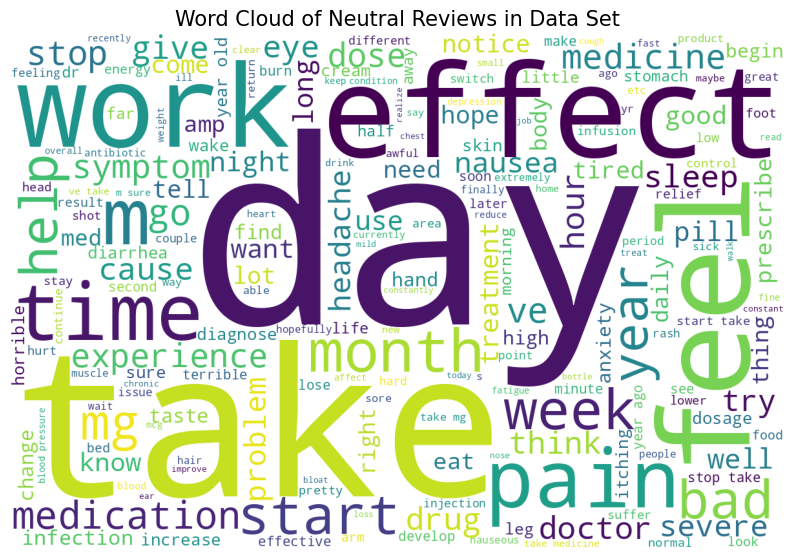

In [47]:
#Wordcloud for the manual neutral sentiments

neutral = " ".join([text for text in data_sub['review_cleaned'][data_sub['Manual_Sentiment'] == 0]])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 800).generate(neutral)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud of Neutral Reviews in Data Set', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

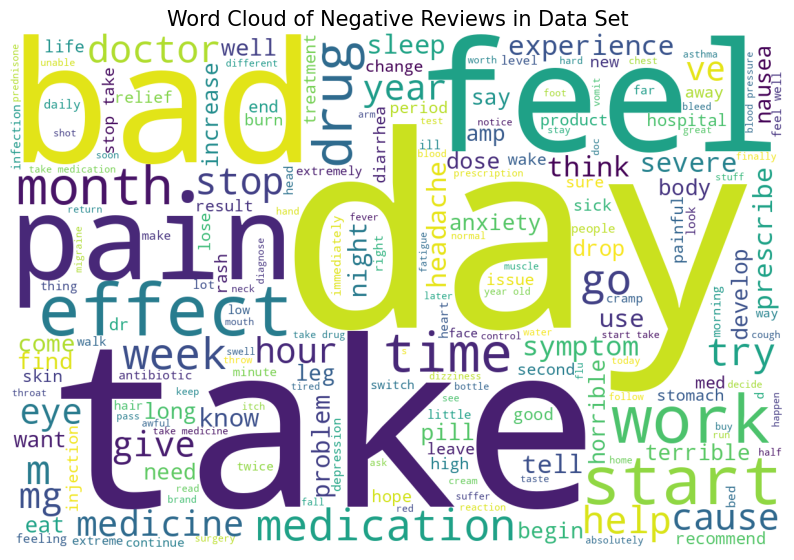

In [48]:
#Wordcloud for the negative manual sentiments in train data set

negative = " ".join([text for text in data_sub['review_cleaned'][data_sub['Manual_Sentiment'] == -1]])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 800).generate(negative)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud of Negative Reviews in Data Set', fontsize = 15)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [49]:
# Check top 30 words used in postive sentiment reviews. In order to do this, converting cleaned reviews to a list 
data_sub_pos_reviews_inlist = data_sub[data_sub['Manual_Sentiment'] == 1]['review_cleaned'].tolist()

In [50]:
# Split each positive review into words
pos_words = []
for review in data_sub_pos_reviews_inlist:
    pos_words.extend(review.split())

# Count the occurrence of each word in positive reviews
data_sub_pos_reviews_word_counts = Counter(pos_words)

# Find the top 30 most frequently used words in positive reviews
positive_reviews_top30_words = pd.DataFrame(data_sub_pos_reviews_word_counts.most_common(30), columns=['Words used', 'Frequency'])
positive_reviews_top30_words

Words used  Frequency
0          day       1746
1         take       1443
2         year       1306
3          not       1175
4         work       1163
5       effect        993
6         feel        943
7         pain        942
8         week        854
9           go        846
10        time        825
11       month        793
12          mg        760
13       start        759
14           m        658
15        help        615
16    medicine        594
17          ve        569
18  medication        566
19      doctor        564
20         try        531
21        like        514
22        life        496
23         get        481
24         bad        467
25        well        467
26        good        445
27        pill        384
28       great        380
29   prescribe        372

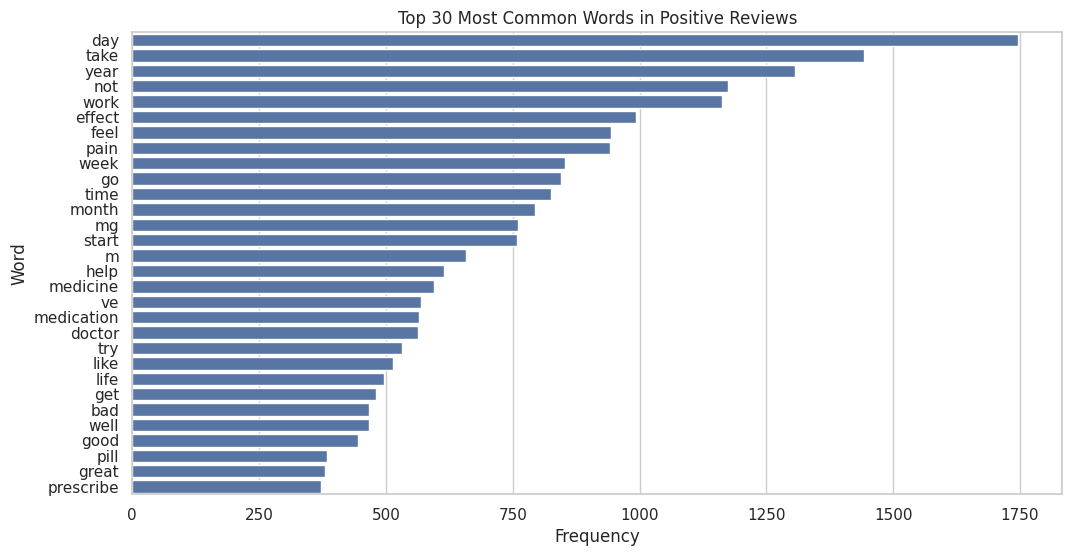

In [51]:
# Plot the frequency of top 30 words used in positive reviews
snsb.set(style="whitegrid")
plt.figure(figsize=(12, 6))
snsb.barplot(data=positive_reviews_top30_words, x="Frequency", y="Words used", color="b")

# Set plot title and axes labels
plt.title("Top 30 Most Common Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")

# Show the plot
plt.show()

In [52]:
# Repeat the above steps to find top 30 words used in negative reviews
data_sub_neg_reviews_inlist = data_sub[data_sub['Manual_Sentiment'] == -1]['review_cleaned'].tolist()

# Split each negative review into words
data_sub_neg_reviews_words = []
for review in data_sub_neg_reviews_inlist:
    data_sub_neg_reviews_words.extend(review.split())

# Count the occurrence of each word in negative reviews
data_sub_neg_reviews_word_counts = Counter(data_sub_neg_reviews_words)

# Find the top 30 most frequently used words in negative reviews
negative_reviews_top30_words = pd.DataFrame(data_sub_neg_reviews_word_counts.most_common(30), columns=['Words used', 'Frequency'])
negative_reviews_top30_words

Words used  Frequency
0         take        515
1          day        472
2          not        465
3         pain        322
4         feel        292
5          bad        273
6        start        242
7       effect        239
8           go        226
9         drug        213
10      doctor        212
11        week        206
12  medication        201
13        work        199
14       month        198
15        time        193
16           m        180
17        like        177
18        year        175
19        stop        170
20      severe        151
21         get        146
22         try        141
23        hour        137
24    medicine        135
25        help        130
26          mg        126
27       cause        121
28  experience        120
29         eye        120

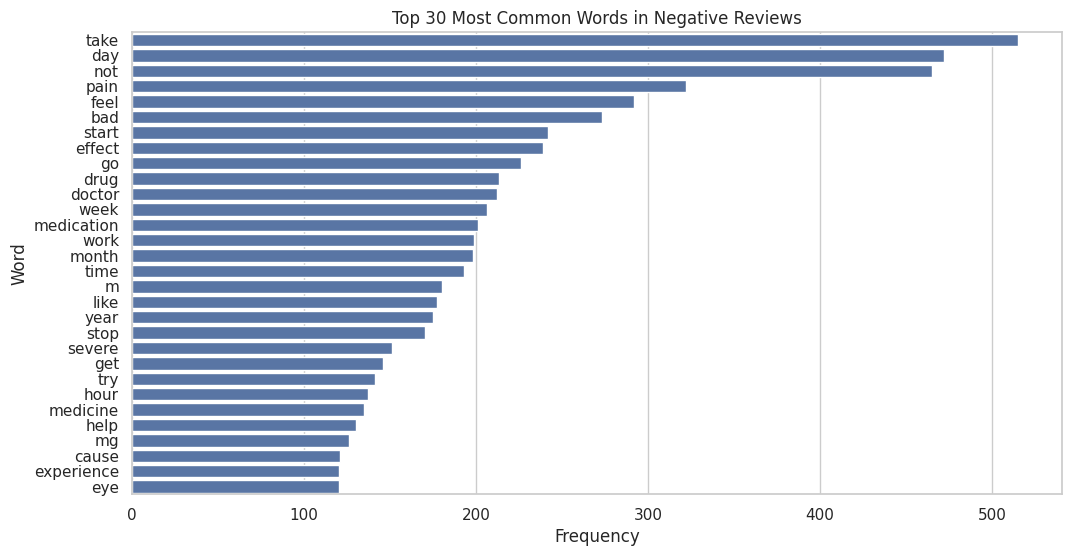

In [53]:
# Plot the frequency of top 30 words used in negative reviews
snsb.set(style="whitegrid")
plt.figure(figsize=(12, 6))
snsb.barplot(data=negative_reviews_top30_words, x="Frequency", y="Words used", color="b")

# Set plot title and axes labels
plt.title("Top 30 Most Common Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")

# Show the plot
plt.show()

In [54]:
# Repeat the above steps to find top 30 words used in neutral reviews
data_sub_neu_reviews_inlist = data_sub[data_sub['Manual_Sentiment'] == 0]['review_cleaned'].tolist()

# Split each neutral review into words
data_sub_neu_reviews_words = []
for review in data_sub_neu_reviews_inlist:
    data_sub_neu_reviews_words.extend(review.split())

# Count the occurrence of each word in neutral reviews
data_sub_neu_reviews_word_counts = Counter(data_sub_neu_reviews_words)

# Find the top 30 most frequently used words in neutral reviews
neutral_reviews_top30_words = pd.DataFrame(data_sub_neu_reviews_word_counts.most_common(30), columns=['Words used', 'Frequency'])
neutral_reviews_top30_words

Words used  Frequency
0         take        267
1          day        248
2          not        215
3         feel        176
4       effect        175
5         pain        152
6         work        149
7            m        143
8         year        140
9         time        130
10       start        129
11       month        129
12          mg        115
13        week        113
14         bad        104
15        help        100
16        like         99
17        stop         92
18          go         90
19  medication         88
20          ve         87
21    medicine         82
22        dose         68
23      doctor         67
24         get         66
25     symptom         66
26        hour         65
27  experience         62
28        give         58
29         eye         55

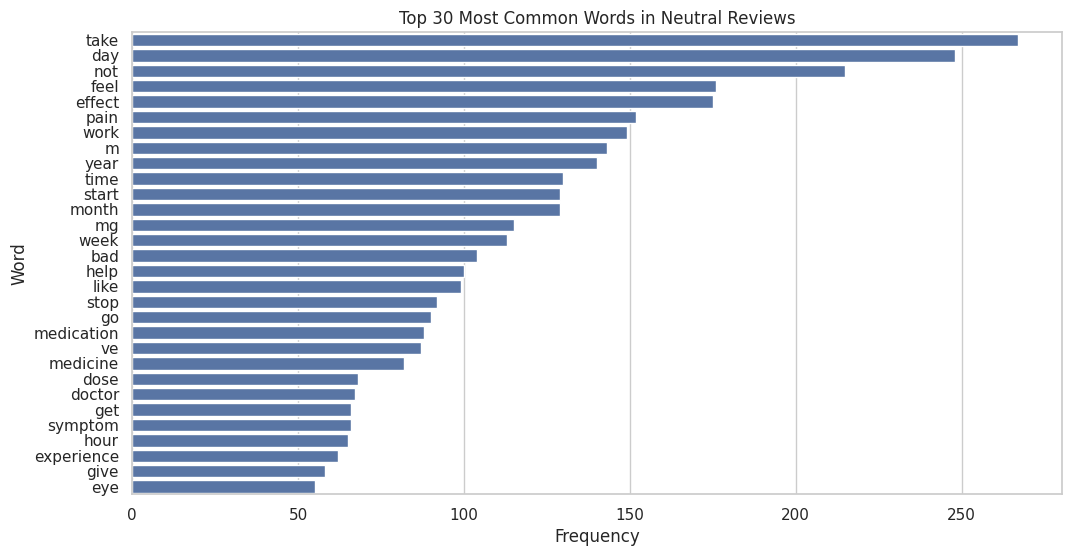

In [55]:
# Plot the frequency of top 30 words used in neutral reviews
snsb.set(style="whitegrid")
plt.figure(figsize=(12, 6))

snsb.barplot(data=neutral_reviews_top30_words, x="Frequency", y="Words used", color="b")

# Set plot title and axes labels
plt.title("Top 30 Most Common Words in Neutral Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")

# Show the plot
plt.show()

# Part of Speech

There are a few grammatical and structural errors in the given text. Here's the corrected version:

We have two approaches, the Markov model and Hidden Markov Model (HMM), to perform PoS Tagging. In the Markov model, the future state is determined solely by the current state and is not influenced by any previous states. Similarly, in HMM, the future state is determined solely by the current state and is not influenced by any previous states.

We will also explore fine-grained and coarse-grained POS tagging, which refer to the level of detail or granularity in the classification of parts of speech in NLP tasks. Fine-grained POS tagging can be useful in capturing subtle nuances and variations in sentiment expressed through different parts of speech. For example, adjectives and adverbs are often indicative of sentiment and can provide valuable insights into the emotional tone of a sentence.

On the other hand, coarse-grained POS tagging is useful in checking the overall syntactic structure of a sentence without getting into finer details.

Sources:

https://towardsdatascience.com/part-of-speech-tagging-for-beginners-3a0754b2ebba#:~:text=Part%2Dof%2Dspeech%20(POS,the%20word%20and%20its%20context.

https://notebook.community/rishuatgithub/MLPy/nlp/UPDATED_NLP_COURSE/02-Parts-of-Speech-Tagging/00-POS-Basics

In [ ]:
# Function to perform coarse-grained PoS tagging using Markov's Model
def markov_pos_tagging(sentences):
    pos_tags = []
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        tagged_tokens = pos_tag(tokens)
        pos_tags.extend([tag[1] for tag in tagged_tokens])
    return pos_tags

# def markov_pos_tagging(sentences):
#     nlp = spacy.load("en_core_web_sm")
#     pos_tags = []
#     for sentence in sentences:
#         doc = nlp(sentence)
#         pos_tags.extend([token.pos_ for token in doc])
#     return pos_tags

In [ ]:
# Function to perform fine-grained PoS tagging using HMM
def hmm_pos_tagging(sentences):
    pos_tags = []
    for sentence in sentences:
        doc = nlp(sentence)
        pos_tags.extend([token.tag_ for token in doc])
    return pos_tags

In [ ]:
# Perform coarse-grained PoS tagging using Markov's Model
coarse_grained_pos_tags = train['review_cleaned'].apply(markov_pos_tagging)

In [ ]:
# Perform fine-grained PoS tagging using HMM
fine_grained_pos_tags = train['review_cleaned'].apply(hmm_pos_tagging)

KeyboardInterrupt: ignored

In [ ]:
coarse_grained_pos_tags

0           [DT, NN, DT, NN, NN, NN, NN, NN, NN, NN, NN, NNS, DT, NN, NN, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, ...]
1       [NN, NN, DT, NN, NN, DT, NN, NN, NNS, NN, NN, NN, NN, NN, NN, NNS, DT, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NNS, NN, NN, NN, NN, NN, NN, NN, NN, NN, NNS, NN, NN, NNS, NN, NN, NN, DT, NN, NN, ...]
2        [NN, NN, NN, NN, NN, NN, NNS, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, NN, DT, NN, NN, NN, NN, NN, NN, NN, NN,

In [ ]:
fine_grained_pos_tags

# Topic Modelling

In [72]:
!pip install --upgrade smart_open

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import os
os.environ['LC_ALL'] = 'C.UTF-8'
os.environ['LANG'] = 'C.UTF-8'

In [77]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

TypeError: ignored

In [58]:
# Create a list of preprocessed documents
documents = [doc.split() for doc in data_sub['review_cleaned']]

In [61]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

NameError: ignored

# Sentiment Analysis

### NRC

In [ ]:
# Load NRC Emotion Lexicon
nrc_lexicon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['word', 'emotion', 'value'])

In [ ]:
# Get unique emotions
emotions = nrc_lexicon['emotion'].unique()

# Define a function to calculate emotion scores for each review
def get_emotion_scores(review):
    # Initialize dictionary to hold scores
    scores = {e: 0 for e in emotions}
    # Split review into words
    words = review.split()
    # Loop through words and calculate scores
    for word in words:
        # Check if word is in NRC Emotion Lexicon
        word_emotions = nrc_lexicon[nrc_lexicon['word'] == word.lower()]['emotion']
        if not word_emotions.empty:
            # Increment scores for each emotion the word is associated with
            for e in word_emotions:
                scores[e] += 1
    return scores

train_nrc = train.copy()

# Apply the function to each review in the dataframe
train_nrc['emotions'] = train_nrc['review_cleaned'].apply(get_emotion_scores).apply(pd.Series)

In [ ]:
train_nrc.to_csv('NRC.csv')

In [ ]:
train_nrc.head()

ID            drugName condition  \
0  158850     Methylphenidate      ADHD   
1  219408  Dexmethylphenidate      ADHD   
2   41657           Clonidine      ADHD   
3  158606     Methylphenidate      ADHD   
4  106012         Atomoxetine      ADHD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   patientreview  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     "Concerta has saved my life and I am doing great in school. I just got my progress report and I got a 3.8"   
1  "My 6.5 yr old son takes 5mg XR on school days only.has been on it for 30 school days.  He does great in school and it appears a miracle help to him. It does seem to wear off too early so I will talk to the Dr. About that next week. When he comes home from school and we try to do his homework it is a nightmare. He has a very mild case of ADHD.  He eats well so far. He sleeps better and longer now than he did before starting the medicine. But a few weeks ago he told me he feels his heart beating fast and pains in his left side in physical education. Took him for a complete cardio. Check with EkG, ultrasound and all kinds of other tests. He checked out in perfect condition. So we will keep an eye out and see."   
2                                                                                                                                                                                                                                                               "My granddaughter started Kapvay and she is almost 10 years old. She has been diagnosed with ADD. She was using Intuniv,  but 1 mg not enough for attention and 2 mg made her so so tired.\r\r\nStarted Kapvay and WOW&hellip;cannot sleep&hellip;.huge blister on her lip&hellip;.legs hurt so bad. She is almost 10 but small, she weighs 47 pounds (she was 2.8 lb preemie-11 weeks early). Have to stop medicine. I also read that it was not a great choice for ADD alone."   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    "This Patch is amazing. For those of you having trouble removing the backing, just put patch in fridge for a while, or over night. We just keep the box in the fridge. Peels off nice and easy. And the cold patch helps with the itching."   
4                                                                                                                               

### **Using** VADER Lexicon

##### VADER on Test Data

In [ ]:
# Download VADER lexicon from 'nltk'
nltk.download('vader_lexicon')

# Import Sentiment Analyzer from this module and create an instance of this
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

test_vader = test.copy()
# Extract polarity scores for each review, these scores are extracted as key value pairs 
test_vader['VaderP'] = test_vader['review_cleaned'].apply(lambda x: analyzer.polarity_scores(x))

# Get the key with the maximum value for each review and store it in a new column
test_vader['VaderSentiment'] = test_vader['VaderP'].apply(lambda x: max(x, key=x.get))

test_vader.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ID         drugName condition  \
0   37121          Vyvanse      ADHD   
1   46262        Modafinil      ADHD   
2  158719  Methylphenidate      ADHD   
3  225165        Bupropion      ADHD   
4  178474   Adzenys XR-ODT      ADHD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   patientreview  \
0                               "My 9 yr old son started vyvanse two weeks ago (lowest dosage) and we saw positive results right away.  In addition to ADHD he has a writing disorder and will literally sit and stare at his paper for hours because he can&#039;t get his thoughts written out.  The first day he tried vyvanse he took it in the morning and then came home from school and without being asked he finished his book (25 pages) and then sat down and wrote a 2.5 page book report!  I have not noticed a change in his appetite and he has only experienced some minor sleep issues but it does not seem to really bother him.  Testing has shown my son to be highly intelligent but his grades do not reflect that - I finally have hope that he can reach his potential!"   
1  "This medicine is literally a life changer. For so long I took adderall to get me through the day and to sustain focus during college courses. Adderall gave me severe anxiety and depression and I thought I had lost all hope seeing as that is &quot;the best&quot; drug for ADD... WRONG! Modafinil gives you the same level of focus without ANY side effects... no anxiety, no depression, no euphoria (which is great because adderall is very addictive) and minimal weight loss. It has improved my life to the point that my friends and family members have been commenting on how great I sound. I just wanted to share my experience (never have before, but I felt compelled to because this is an emotional topic for me) in case you&#039;re nervous about giving it a shot."   
2                                                                                                                                                                                                                                                                                                                                                                     "My 8 year old son has been on Daytrana for approximately 6 months and I have to say of all the ADHD medicines out there this is the best. We have tried almost every ADHD medicine out there and nothing lasted as long as it was supposed to or had no effect whatsoever. The only problem with the patch is its sticking. It never seems to stick and in the summer I had to find something waterproof to put over it."   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              "Started wellbutrin 150 XL  once a day last year. Went up to 300 XL once a day. I felt very hyper, so went back go 150.

In [ ]:
test_vader.VaderSentiment.value_counts()

neu         2291
compound     691
neg          131
pos           82
Name: VaderSentiment, dtype: int64

##### Vader on Train Data

In [ ]:
# Download VADER lexicon from 'nltk'
nltk.download('vader_lexicon')

# Import Sentiment Analyzer from this module and create an instance of this
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

train_vader = train.copy()
# Extract polarity scores for each review, these scores are extracted as key value pairs 
train_vader['VaderP'] = train_vader['review_cleaned'].apply(lambda x: analyzer.polarity_scores(x))


# Get the key with the maximum value for each review and store it in a new column
train_vader['VaderSentiment'] = train_vader['VaderP'].apply(lambda x: max(x, key=x.get))

train_vader.head(3)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


ID            drugName condition  \
0  158850     Methylphenidate      ADHD   
1  219408  Dexmethylphenidate      ADHD   
2   41657           Clonidine      ADHD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   patientreview  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     "Concerta has saved my life and I am doing great in school. I just got my progress report and I got a 3.8"   
1  "My 6.5 yr old son takes 5mg XR on school days only.has been on it for 30 school days.  He does great in school and it appears a miracle help to him. It does seem to wear off too early so I will talk to the Dr. About that next week. When he comes home from school and we try to do his homework it is a nightmare. He has a very mild case of ADHD.  He eats well so far. He sleeps better and longer now than he did before starting the medicine. But a few weeks ago he told me he feels his heart beating fast and pains in his left side in physical education. Took him for a complete cardio. Check with EkG, ultrasound and all kinds of other tests. He checked out in perfect condition. So we will keep an eye out and see."   
2                                                                                                                                                                                                                                                               "My granddaughter started Kapvay and she is almost 10 years old. She has been diagnosed with ADD. She was using Intuniv,  but 1 mg not enough for attention and 2 mg made her so so tired.\r\r\nStarted Kapvay and WOW&hellip;cannot sleep&hellip;.huge blister on her lip&hellip;.legs hurt so bad. She is almost 10 but small, she weighs 47 pounds (she was 2.8 lb preemie-11 weeks early). Have to stop medicine. I also read that it was not a great choice for ADD alone."   

   rating reviewdate  Useful  Manual_Sentiment  \
0    10.0 2009-03-20      23               1.0   
1     8.0 2012-12-28      63               1.0   
2     1.0 2016-10-11      10              -1.0   

                                                                                                                                                                                                                                                                                                                                              review_cleaned  \
0                                                                                                                                                                                                                                                                                                    concerta save life great school get progress report get   
1  yr old son take mg xr school 

In [ ]:
train_vader.VaderSentiment.value_counts()

neu         3183
compound     998
neg          212
pos          121
Name: VaderSentiment, dtype: int64

In [ ]:
train_vader.head(3)

ID            drugName condition  \
0  158850     Methylphenidate      ADHD   
1  219408  Dexmethylphenidate      ADHD   
2   41657           Clonidine      ADHD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   patientreview  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     "Concerta has saved my life and I am doing great in school. I just got my progress report and I got a 3.8"   
1  "My 6.5 yr old son takes 5mg XR on school days only.has been on it for 30 school days.  He does great in school and it appears a miracle help to him. It does seem to wear off too early so I will talk to the Dr. About that next week. When he comes home from school and we try to do his homework it is a nightmare. He has a very mild case of ADHD.  He eats well so far. He sleeps better and longer now than he did before starting the medicine. But a few weeks ago he told me he feels his heart beating fast and pains in his left side in physical education. Took him for a complete cardio. Check with EkG, ultrasound and all kinds of other tests. He checked out in perfect condition. So we will keep an eye out and see."   
2                                                                                                                                                                                                                                                               "My granddaughter started Kapvay and she is almost 10 years old. She has been diagnosed with ADD. She was using Intuniv,  but 1 mg not enough for attention and 2 mg made her so so tired.\r\r\nStarted Kapvay and WOW&hellip;cannot sleep&hellip;.huge blister on her lip&hellip;.legs hurt so bad. She is almost 10 but small, she weighs 47 pounds (she was 2.8 lb preemie-11 weeks early). Have to stop medicine. I also read that it was not a great choice for ADD alone."   

   rating reviewdate  Useful  Manual_Sentiment  \
0    10.0 2009-03-20      23               1.0   
1     8.0 2012-12-28      63               1.0   
2     1.0 2016-10-11      10              -1.0   

                                                                                                                                                                                                                                                                                                                                              review_cleaned  \
0                                                                                                                                                                                                                                                                                                    concerta save life great school get progress report get   
1  yr old son take mg xr school 

##### Manual Check of Vader

In [ ]:
# Check reviews where customer gave a high rating but  VADER model gave a negative score (negative sentiment) for that review
train_vader[train_vader['ID']== train_vader.query('rating == 10.0 & VaderSentiment == "neg"')['ID'].values[0]]

ID    drugName  condition              patientreview  rating  \
98  179233  Olanzapine  Agitation  "it calms my raging mind"    10.0   

   reviewdate  Useful  Manual_Sentiment  review_cleaned  reviewchars  \
98 2015-11-17       8               1.0  calm rage mind           25   

    reviewchars_clean  reviewwords  reviewwords_clean  reviewsentence  \
98                 14            7                  3               1   

    reviewsentence_clean  \
98                     1   

                                                             VaderP  \
98  {'neg': 0.522, 'neu': 0.145, 'pos': 0.333, 'compound': -0.3182}   

   VaderSentiment  
98            neg

In [ ]:
# Check reviews where customer gave a low rating but VADER model gave a positive score (positive sentiment) for that review
train_vader[train_vader['ID']== train_vader.query('Manual_Sentiment == -1  & VaderSentiment == "pos"')['ID'].values[0]]

ID drugName               condition  \
1086  117955   Imuran  Crohn's Disease, Acute   

                                                                     patientreview  \
1086  "Did not help much with my Crohn&#039;s, but less side effects than others."   

      rating reviewdate  Useful  Manual_Sentiment      review_cleaned  \
1086     2.0 2010-09-12       6              -1.0  help crohns effect   

      reviewchars  reviewchars_clean  reviewwords  reviewwords_clean  \
1086           76                 18           22                  3   

      reviewsentence  reviewsentence_clean  \
1086               1                     1   

                                                            VaderP  \
1086  {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.4019}   

     VaderSentiment  
1086            pos

From the above two reviews, we can see that the VADER sentiment analyzer is not detecting emotions correctly. VADER uses a Bag-of-Words (BoW) approach in sentiment analysis, which ignores the relationships between words. These relationships are essential for sentiment analysis. We will explore a few other lexicons, perform sentiment analysis using them, and compare the polarities.

### RoBERTa Transformer Model

In [ ]:
# Define the model to use
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Load the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def roberta_polarity(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'RobNeg' : scores[0],
        'RobNue' : scores[1],
        'RobPos' : scores[2]
    }
    return scores_dict

In [ ]:
train_rob = train.copy()
train_rob['Rob'] = train_rob['review_cleaned'].apply(roberta_polarity)

In [ ]:
train_rob

ID            drugName    condition  \
0     158850     Methylphenidate         ADHD   
1     219408  Dexmethylphenidate         ADHD   
2      41657           Clonidine         ADHD   
3     158606     Methylphenidate         ADHD   
4     106012         Atomoxetine         ADHD   
...      ...                 ...          ...   
4509  164440          Diclofenac  zen Shoulde   
4510  163940           Ibuprofen  zen Shoulde   
4511  111774             Relafen  zen Shoulde   
4512   87803            Naproxen  zen Shoulde   
4513   87551            Naproxen  zen Shoulde   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      patientreview  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "Concerta has saved my life and I am doing great in school. I just got my progress report and I got a 3.8"   
1     "My 6.5 yr old son takes 5mg XR on school days only.has been on it for 30 school days.  He does great in school and it appears a miracle help to him. It does seem to wear off too early so I will talk to the Dr. About that next week. When he comes home from school and we try to do his homework it is a nightmare. He has a very mild case of ADHD.  He eats well so far. He sleeps better and longer now than he did before starting the medicine. But a few weeks ago he told me he feels his heart beating fast and pains in his left side in physical education. Took him for a complete cardio. Check with EkG, ultrasound and all kinds of other tests. He checked out in perfect condition. So we will keep an eye out and see."   
2                                                                                                                                                                                                                                                                  "My granddaughter started Kapvay and she is almost 10 years old. She has been diagnosed with ADD. She was using Intuniv,  but 1 mg not enough for attention and 2 mg made her so so tired.\r\r\nStarted Kapvay and WOW&hellip;cannot sleep&hellip;.huge blister on her lip&hellip;.legs hurt so bad. She is almost 10 but small, she weighs 47 pounds (she was 2.8 lb preemie-11 weeks early). Have to stop medicine. I also read that it was not a great choice for ADD alone."   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       "This Patch is amazing. F

In [ ]:
# import necessary libraries
import torch
import transformers

# load the RoBERTa tokenizer
tokenizer = transformers.RobertaTokenizer.from_pretrained('roberta-base')

# load the RoBERTa model
model = transformers.RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# set the device to GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# define a function to tokenize and encode the text
def tokenize_text(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=256,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt'
    )

#Creating a copy of test df
test_roberta = test.copy()

# apply the function to the 'review_cleaned' column of the test dataset
encoded_data = test_roberta['review_cleaned'].apply(tokenize_text)

# create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(
    encoded_data.tolist(),
    batch_size=32,
    shuffle=False
)

# set the model to evaluation mode
model.eval()

# create an empty list to hold the predictions
predictions = []


# make predictions on the test dataset
with torch.no_grad():
    for data in test_loader:
        data = {key: value.to(device) for key, value in data.items()}
        outputs = model(**data)
        _, predicted = torch.max(outputs.logits, dim=1)
        predictions.extend(predicted.tolist())

# create a new column in the test dataset for the predicted sentiment
test_roberta['predicted_sentiment'] = predictions

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

ValueError: ignored

In [ ]:
# Import transformers library
import transformers

# load the RoBERTa tokenizer
tokenizer = transformers.RobertaTokenizer.from_pretrained('roberta-base')

# Load the pre-trained sentiment analysis model
model = transformers.pipeline('sentiment-analysis', model='roberta-base')

#Creating a copy of test df
test_roberta = test.copy()

# Use the model to predict the sentiment of each review
test_roberta['RoBERTaSentiment'] = test_roberta['review_cleaned'].apply(lambda x: model(x)[0]['label'])

test_roberta.head(3)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

ID         drugName condition  \
0   37121          Vyvanse      ADHD   
1   46262        Modafinil      ADHD   
2  158719  Methylphenidate      ADHD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   patientreview  \
0                               "My 9 yr old son started vyvanse two weeks ago (lowest dosage) and we saw positive results right away.  In addition to ADHD he has a writing disorder and will literally sit and stare at his paper for hours because he can&#039;t get his thoughts written out.  The first day he tried vyvanse he took it in the morning and then came home from school and without being asked he finished his book (25 pages) and then sat down and wrote a 2.5 page book report!  I have not noticed a change in his appetite and he has only experienced some minor sleep issues but it does not seem to really bother him.  Testing has shown my son to be highly intelligent but his grades do not reflect that - I finally have hope that he can reach his potential!"   
1  "This medicine is literally a life changer. For so long I took adderall to get me through the day and to sustain focus during college courses. Adderall gave me severe anxiety and depression and I thought I had lost all hope seeing as that is &quot;the best&quot; drug for ADD... WRONG! Modafinil gives you the same level of focus without ANY side effects... no anxiety, no depression, no euphoria (which is great because adderall is very addictive) and minimal weight loss. It has improved my life to the point that my friends and family members have been commenting on how great I sound. I just wanted to share my experience (never have before, but I felt compelled to because this is an emotional topic for me) in case you&#039;re nervous about giving it a shot."   
2                                                                                                                                                                                                                                                                                                                                                                     "My 8 year old son has been on Daytrana for approximately 6 months and I have to say of all the ADHD medicines out there this is the best. We have tried almost every ADHD medicine out there and nothing lasted as long as it was supposed to or had no effect whatsoever. The only problem with the patch is its sticking. It never seems to stick and in the summer I had to find something waterproof to put over it."   

   rating reviewdate  Useful  \
0     8.0 2017-02-27      36   
1    10.0 2017-03-07      53   
2    10.0 2010-10-19      21   

                                                                                                                                                                                                                                                                                                                                                                                                                    review_cleaned  \
0                              yr old son start vyvanse week ago low dosage see positive result right away addition adhd writing disorder literally sit stare paper hour not thought write day try vyvanse tak

In [ ]:
test_roberta.RoBERTaSentiment.value_counts()

LABEL_1    3195
Name: RoBERTaSentiment, dtype: int64

In [ ]:
# Load the pre-trained sentiment analysis model
model = transformers.pipeline('sentiment-analysis', model='roberta-base')

train_roberta = train.copy()
# Use the model to predict the sentiment of each review
train_roberta['RoBERTaSentiment'] = train_roberta['review_cleaned'].apply(lambda x: model(x)[0]['label'])

train_roberta.head()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifi

ID            drugName condition  \
0  158850     Methylphenidate      ADHD   
1  219408  Dexmethylphenidate      ADHD   
2   41657           Clonidine      ADHD   
3  158606     Methylphenidate      ADHD   
4  106012         Atomoxetine      ADHD   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   patientreview  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     "Concerta has saved my life and I am doing great in school. I just got my progress report and I got a 3.8"   
1  "My 6.5 yr old son takes 5mg XR on school days only.has been on it for 30 school days.  He does great in school and it appears a miracle help to him. It does seem to wear off too early so I will talk to the Dr. About that next week. When he comes home from school and we try to do his homework it is a nightmare. He has a very mild case of ADHD.  He eats well so far. He sleeps better and longer now than he did before starting the medicine. But a few weeks ago he told me he feels his heart beating fast and pains in his left side in physical education. Took him for a complete cardio. Check with EkG, ultrasound and all kinds of other tests. He checked out in perfect condition. So we will keep an eye out and see."   
2                                                                                                                                                                                                                                                               "My granddaughter started Kapvay and she is almost 10 years old. She has been diagnosed with ADD. She was using Intuniv,  but 1 mg not enough for attention and 2 mg made her so so tired.\r\r\nStarted Kapvay and WOW&hellip;cannot sleep&hellip;.huge blister on her lip&hellip;.legs hurt so bad. She is almost 10 but small, she weighs 47 pounds (she was 2.8 lb preemie-11 weeks early). Have to stop medicine. I also read that it was not a great choice for ADD alone."   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    "This Patch is amazing. For those of you having trouble removing the backing, just put patch in fridge for a while, or over night. We just keep the box in the fridge. Peels off nice and easy. And the cold patch helps with the itching."   
4                                                                                                                               

In [ ]:
train_roberta.RoBERTaSentiment.value_counts()

LABEL_0    4514
Name: RoBERTaSentiment, dtype: int64

In [ ]:
# Define the model to use
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# Load the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
!pip install tqdm

from tqdm.notebook import tqdm

res = {}
for i, row in tqdm(subset.iterrows(), total=len(subset)):
    try:
        text = row['review_cleaned']
        myid = row['ID']
        vader_result = analyzer.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/5476 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Broke for id 56014
Broke for id 59172
Broke for id 21647
Broke for id 56083
Broke for id 56110
Broke for id 219457
Broke for id 219452
Broke for id 61006
Broke for id 219400
Broke for id 219314
Broke for id 89917
Broke for id 89990
Broke for id 21124
Broke for id 161062
Broke for id 94604
Broke for id 158065
Broke for id 90042
Broke for id 160936
Broke for id 158253
Broke for id 161125
Broke for id 134145
Broke for id 134475
Broke for id 198548
Broke for id 75452
Broke for id 117982
Broke for id 3680
Broke for id 11324
Broke for id 26875
Broke for id 11318
Broke for id 3685
Broke for id 11347
Broke for id 224113
Broke for id 173590
Broke for id 135492
Broke for id 208428
Broke for id 154223
Broke for id 223863
Broke for id 223868
Broke for id 154217
Broke for id 154225
Broke for id 223862
Broke for id 154216
Broke for id 223870
Broke for id 160077
Broke for id 173800
Broke for id 183381
Broke for id 26935
Broke for id 71894
Broke for i

In [ ]:
polarities = pd.DataFrame(res).T
polarities = polarities.reset_index().rename(columns={'index': 'ID'})
polarities = polarities.merge(subset, how='left')

In [ ]:
polarities.head()

Empty DataFrame
Columns: [ID, drugName, condition, patientreview, rating, reviewdate, Useful, Manual_Sentiment, review_cleaned, sentiment]
Index: []

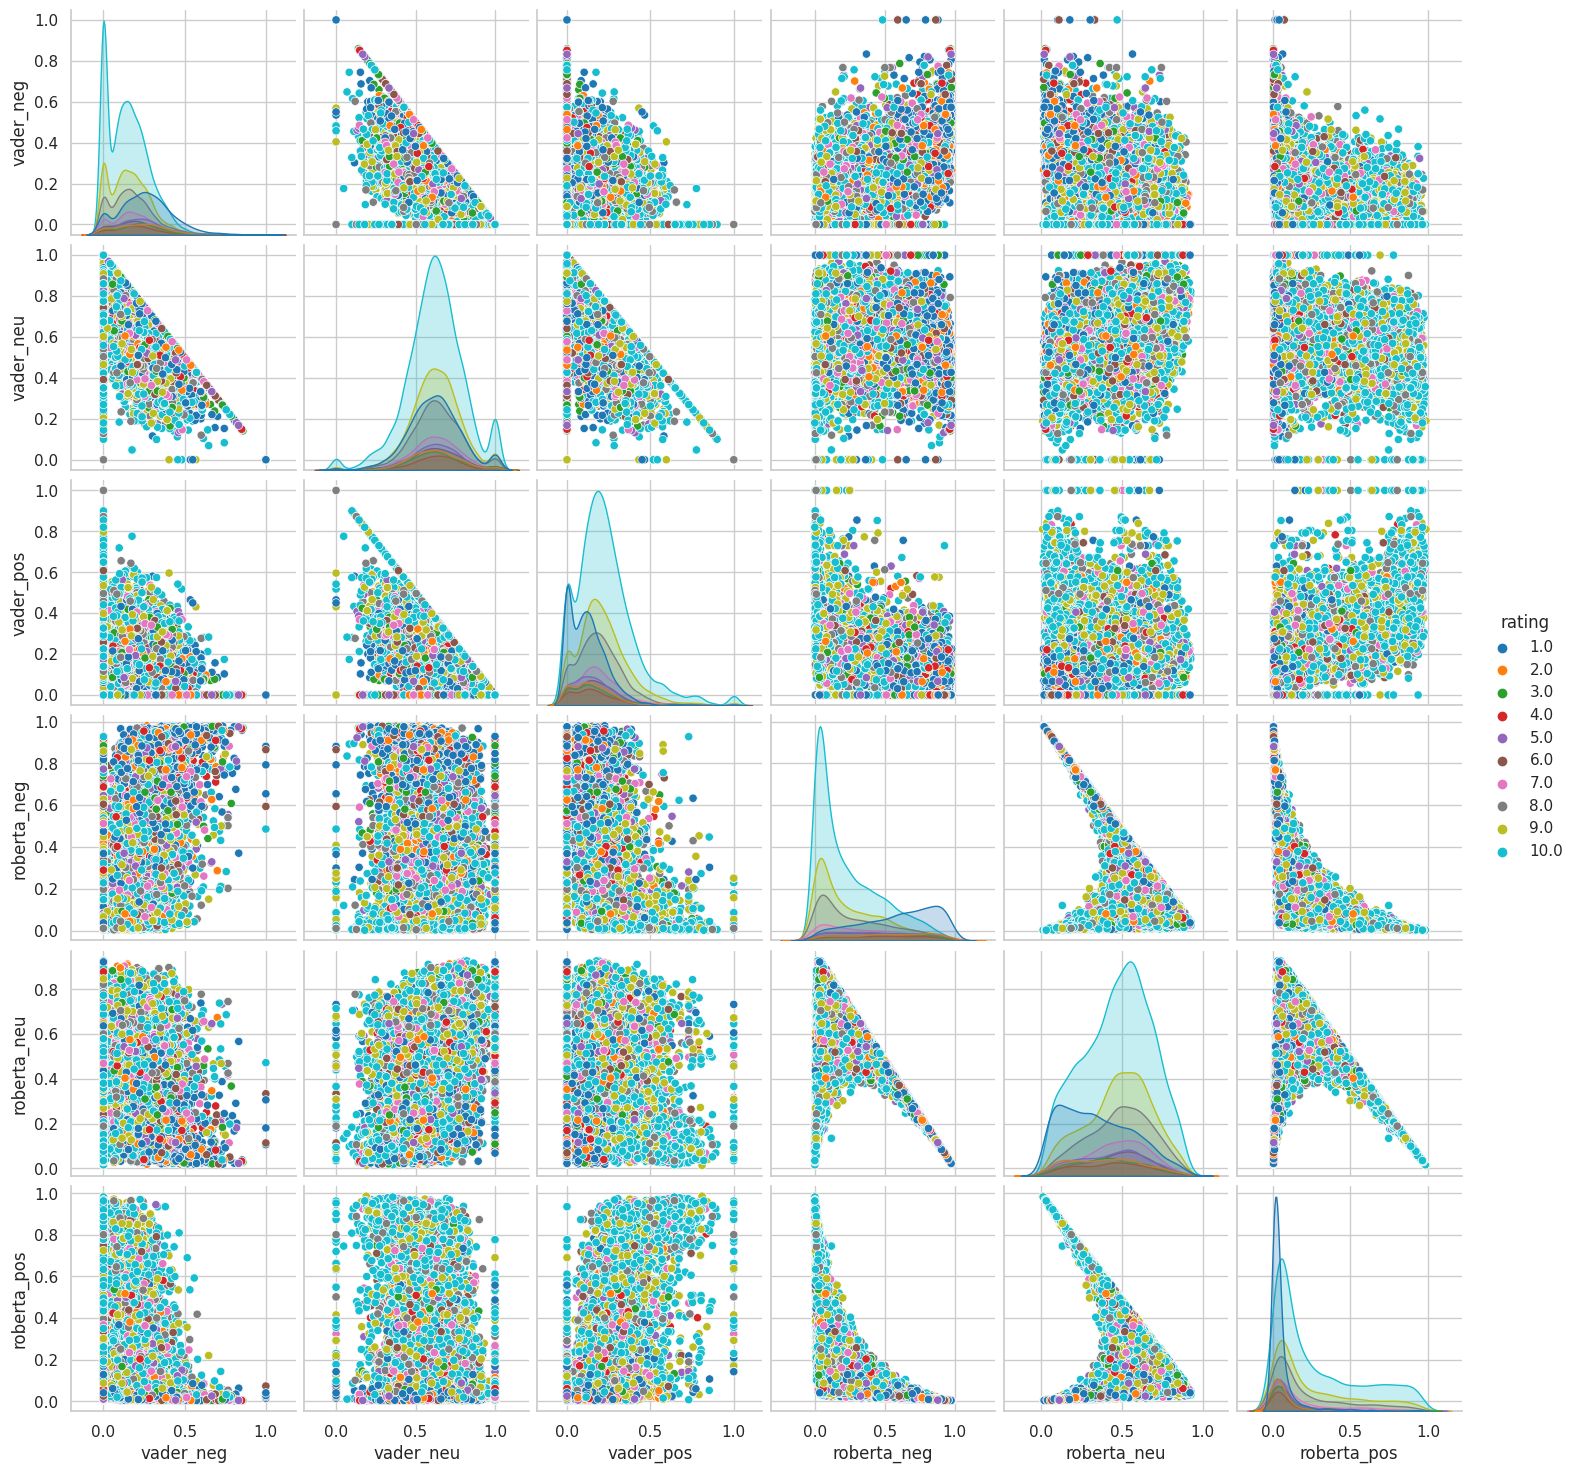

In [ ]:
# Comparing results of both vader and roberte polarities 
snsb.pairplot(data=polarities,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()


<Axes: >

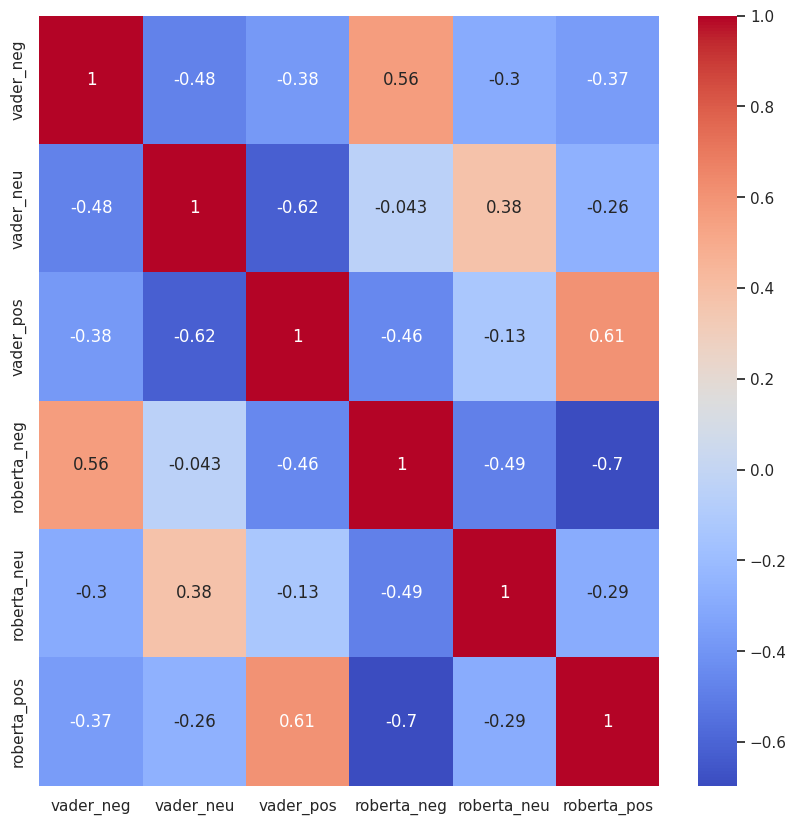

In [ ]:
# Calculate the correlation matrix
corr_matrix = polarities[['vader_neg', 'vader_neu', 'vader_pos',
                         'roberta_neg', 'roberta_neu', 'roberta_pos']].corr()

# Plot the correlation matrix using Seaborn
snsb.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
polarities[polarities['ID'] == 67275]

ID  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
8669  67275        0.0        1.0        0.0             0.0     0.093159   

      roberta_neu  roberta_pos    drugName    condition  \
8669     0.656285     0.250557  Omeprazole  Indigestion   

                                                                                                                                          patientreview  \
8669  "I had too much acid in my stomach. This was a life saver, couldn&#039;t eat or function. Ever since I started taking this, I have my life back."   

      rating reviewdate  Useful  num_char  num_words  num_sentences  \
8669    10.0 2013-07-30      29       145         40              3   

      Review_Sentiment  \
8669               1.0   

                                                review_cleaned  vader_comp  
8669  acid stomach life saver not eat function start take life         0.0

In [ ]:
polarities[polarities['ID'] == 223456]

ID  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
12510  223456        0.0        0.0        1.0          0.4019     0.252412   

       roberta_neu  roberta_pos drugName                   condition  \
12510     0.605637     0.141951  Istodax  Peripheral T-cell Lymphoma   

                patientreview  rating reviewdate  Useful  num_char  num_words  \
12510  "Did not help at all."     1.0 2015-07-04       0        22          8   

       num_sentences  Review_Sentiment review_cleaned  vader_comp  
12510              1              -1.0           help      0.4019

In [ ]:
#Checking the length of vectors
all(len(x)==len(subset['context'][0]) for x in subset['context'])

KeyError: ignored

In [ ]:
#Data for model building
modeltrain = subset[['context', 'Review_Sentiment']]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Set max length for the sequences
max_len = 10000

#Pad the sequences to have the same length
X_train_padded = pad_sequences(modeltrain['context'], maxlen=max_len, dtype='float32', padding='post', truncating='post', value=0.0)

#Split the data into training and validation sets (70/30 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, modeltrain['Review_Sentiment'], test_size=0.3, random_state=42)

In [ ]:
#Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Make predictions on the validation set
y_pred = model.predict(X_val)

#Calculate the accuracy of the model on the validation set
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

#Make predictions on the validation set
nb_y_pred = nb_model.predict(X_val)

#Calculate the accuracy of the model on the validation set
nb_accuracy = accuracy_score(y_val, nb_y_pred)
print('Naive Bayes Accuracy:', nb_accuracy)

In [ ]:
from sklearn.svm import SVC

#Train a SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

#Make predictions on the validation set
svm_y_pred = svm_model.predict(X_val)

#Calculate the accuracy of the model on the validation set
svm_accuracy = accuracy_score(y_val, svm_y_pred)
print('SVM Accuracy:', svm_accuracy)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Train a Decision Tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

#Make predictions on the validation set
dt_y_pred = dt_model.predict(X_val)

#Calculate the accuracy of the model on the validation set
dt_accuracy = accuracy_score(y_val, dt_y_pred)
print('Decision Tree Accuracy:', dt_accuracy)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

#Make predictions on the validation set
rf_y_pred = rf_model.predict(X_val)

#Calculate the accuracy of the model on the validation set
rf_accuracy = accuracy_score(y_val, rf_y_pred)
print('Random Forest Accuracy:', rf_accuracy)


# Lexicon 

In [ ]:
!pip install pyumls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.5/236.5 KB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 KB 36.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 28.1 MB/s eta 0:00:00
  Created wheel for leveldb: filename=leveldb-0.201-cp39-cp39-linux_x86_64.whl size=2047592 sha256=8ba1f4c3d46b2758fc2912d79860deb27319523ffc5cd3e7e7f4b44a4c5959ef
  Stored in directory: /root/.cache/pip/wheels/c7/5d/9f/043268a081577de68513e3a0c1919162406abd711f58962e24
  Created wheel for quickumls-simstring: filename=quickumls_simstring-1.1.5.post1-cp39-cp39-linux_x86_64.whl size=1363537 sha256=2331d5dcb1f0ac80e6c727703c1d179a94ab211ec82dbb97e9944d0

In [ ]:
from quickumls import QuickUMLS
nlp = spacy.load("en_core_web_sm")
sentiment_pipeline = nlp.create_pipe("sentiment_analysis")

ImportError: ignored

In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_sm-0.4.0.tar.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 668.8/668.8 KB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 10.7 MB/s eta 0:00:00
  Created wheel for en-core-sci-sm: filename=en_core_sci_sm-0.4.0-py3-none-any.whl size=15660351 sha256=9ffaf9fba2614962a2d90f13ef6a57686afd8d5f4e18838eeabb421c29934dc2
  Stored in directory: /root/.cache/pip/wheels/f0/79/11/5b19b0ba4b8fbe52561d7f2f5addbc97c5e20b417f573ce5f0
Successfully built en-core-sci-sm
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1

In [ ]:
import spacy

# Load spaCy model
nlp = spacy.load("en_core_sci_sm")

# Define function to compute sentiment score for a sentence
def compute_sentiment(sentence):
    doc = nlp(sentence)
    sentiment = 0
    count = 0
    for token in doc:
        if not token.is_stop and token.is_alpha:
            sentiment += token.sentiment
            count += 1
    if count > 0:
        return sentiment / count
    else:
        return 0

In [ ]:
subset.head(1)

ID      drugName                                   condition  \
89120  133303  Tri-Sprintec  0</span> users found this comment helpful.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 patientreview  \
89120  "I have only been on Tri-Sprintec for 20 days now so I am trying to give it a little longer, as I know it takes a while for your body to regulate it. However, it is very hard. I went from being very happy to depressed and moody within a week of starting it. I now have very little patience, which makes me feel terrible, especially because I have a dog and work with children and I want to be patient with them. I also have had an increase in acne since starting it. Painful cramps (which is why this was prescribed to me in the first place--to eliminate cramps) and weight gain. The worst part is that I have had a full period for 20 days straight, not just spotting. This pill is negatively effecting my life and my relationship. I hate it."   

       rating reviewdate  Useful  num_char  num_words  num_sentences  \
89120     1.0 2011-10-22       0       743        164              9   

       Review_Sentiment  \
89120              -1.0   

                                                                                                                                                                                                                                                                                                                              review_cleaned  \
89120  trisprintec day try little long know take body regulate hard go happy depressed moody week start little patience make feel terrible especially dog work child want patient increase acne start painful cramp prescribe placeto eliminate cramp weight gain bad period day straight spot pill negatively effect life relationship hate   

         neg    neu    pos  compound  
89120  0.335  0.489  0.176    -0.886

In [ ]:
# Compute sentiment scores for each review
sentiments = []
for review in subset['review_cleaned']:
    sentiment = compute_sentiment(review)
    sentiments.append(sentiment)

In [ ]:
# Add sentiment scores to dataframe
subset['LexiconSentiment'] = sentiments

In [ ]:
subset['LexiconSentiment'].value_counts()

0.0    17549
Name: LexiconSentiment, dtype: int64

In [ ]:
subset.head()

ID      drugName                                   condition  \
89120   133303  Tri-Sprintec  0</span> users found this comment helpful.   
5714    230608  Depo-Provera  0</span> users found this comment helpful.   
56653    22431      Treximet  0</span> users found this comment helpful.   
73405   230568  Depo-Provera  0</span> users found this comment helpful.   
119275  195620        Aviane  0</span> users found this comment helpful.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  patientreview  \
89120   "I have only been on Tri-Sprintec for 20 days now so I am trying to give it a little longer, as I know it takes a while for your body to regulate it. However, it is very hard. I went from being very happy to depressed and moody within a week of starting it. I now have very little patience, which makes me feel terrible, especially because I have a dog and work with children and I want to be patient with them. I also have had an increase in acne since starting it. Painful cramps (which is why this was prescribed to me in the first place--to eliminate cramps) and weight gain. The worst part is that I have had a full period for 20 days straight, not just spotting. This pill is negatively effecting my life and my relationship. I hate it."   
5714                                                                                                                                                                                                                     "I was on this birth control for about a year and a half and at first I liked it. I had completely stopped having a period all together. It is very convenient only having a shot every three months instead of taking a pill every day. But after about 6 months I had a change in appetite and was hungry all the time and in a years time I gained 30 pounds. My acne seemed to get worse and nothing would help. I went off the drug about a month ago and have already lost 10 pounds. It would be a great choice if not for those side effects."   
56653                                                                                                                                                                                                                                                                                                                                                      "This medicine zapped the migraine away quickly.  I felt &quot;up&quot;.  Slept light with crazy dreams.  10 hrs later I had a bad &quot;coming down&quot; experience.  Paranoid, heart racing, bad trip, dry mouth and initial tingling minor.  This medicine did work, but I didn&#039;t like the negative side effects it had on me.  You may not have any side effects.  Be aware of your body&#039;s reaction."   
73405                                                                                                                                                                                                                                                                                                                             "I have been on Depo on and off for a few years. I did experience some spotting but no heavy period. I have gained a good 15 lbs in the process. Coming off of Depo I gained an additional 10 lbs in 2 months or so. 